In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
veri = pd.read_csv("kalp_rahatsizligi.csv")
veri.tail(3)

,yas,cinsiyet,gogus_agrisi_tipi,hareketsiz_kan_basinci,serum_kolestrol,aclik_kan_sekeri,elektrokardiyografi,en_yuksek_kalp_hizi,anjin_bagli_egsersiz,st_depresyonu,st_egimi,buyuk_damarlar,talasemi,kalp_rahatsizligi
300,57.0,erkek,asemptomatik,130.0,131.0,0,normal,115.0,1,1.2,duz,1.0,tersinir defekt,1
301,57.0,kadin,atipik anjinal,130.0,236.0,0,sol ventikuler hipertrofi,174.0,0,0.0,duz,1.0,normal,1
302,38.0,erkek,anjinal olmayan,138.0,175.0,0,normal,173.0,0,0.0,yukari egimli,NaN,normal,0


### pandas
* verileri bir dataframe yapısında tutar.
* verileri üzerinde basit istatistik işlemleri yapmamızı sağlar.

In [5]:
veri["yas"][10:20]

10    57.0
11    56.0
12    56.0
13    44.0
14    52.0
15    57.0
16    48.0
17    54.0
18    48.0
19    49.0
Name: yas, dtype: float64

In [10]:
veri[["yas","cinsiyet"]][20:25]

,yas,cinsiyet
20,64.0,erkek
21,58.0,kadin
22,58.0,erkek
23,58.0,erkek
24,60.0,erkek


In [11]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yas                     303 non-null    float64
 1   cinsiyet                303 non-null    object 
 2   gogus_agrisi_tipi       303 non-null    object 
 3   hareketsiz_kan_basinci  303 non-null    float64
 4   serum_kolestrol         303 non-null    float64
 5   aclik_kan_sekeri        303 non-null    int64  
 6   elektrokardiyografi     303 non-null    object 
 7   en_yuksek_kalp_hizi     303 non-null    float64
 8   anjin_bagli_egsersiz    303 non-null    int64  
 9   st_depresyonu           303 non-null    float64
 10  st_egimi                303 non-null    object 
 11  buyuk_damarlar          299 non-null    float64
 12  talasemi                301 non-null    object 
 13  kalp_rahatsizligi       303 non-null    int64  
dtypes: float64(6), int64(3), object(5)
memory 

In [15]:
veri[["cinsiyet","talasemi","yas"]][50:56]

,cinsiyet,talasemi,yas
50,kadin,normal,41.0
51,erkek,tersinir defekt,65.0
52,erkek,normal,44.0
53,erkek,normal,44.0
54,erkek,tersinir defekt,60.0
55,erkek,tersinir defekt,54.0


In [ ]:
#describe: her sütuna ait  temel istatistik bilgisini verir.
veri.describe()

In [17]:
veri.serum_kolestrol.describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: serum_kolestrol, dtype: float64

In [25]:
q1_sk=veri["serum_kolestrol"].describe()["25%"]
q3_sk=veri.serum_kolestrol.describe()["75%"]
iqr_sk=q3_sk-q1_sk
alt_sk=q1_sk-1.5*iqr_sk
ust_sk=q3_sk+1.5*iqr_sk
print(q1_sk,q3_sk,iqr_sk,alt_sk,ust_sk)

211.0 275.0 64.0 115.0 371.0


In [27]:
q1_hkb=veri.hareketsiz_kan_basinci.describe()["25%"]
q3_hkb=veri.hareketsiz_kan_basinci.describe()["75%"]
iqr_hkb=q3_hkb-q1_hkb
alt_hkb=q1_hkb-1.5*iqr_hkb
ust_hkb=q3_hkb+1.5*iqr_hkb
print(q1_hkb,iqr_hkb,alt_hkb,ust_hkb)

120.0 20.0 90.0 170.0


In [31]:
# pandas ile verinin içinden istenilen index değerlerini filtreleyebildiğimiz gibi
# istenilen değere aralıklarını da filtrelebiliyoruz
yas_buyuk50=veri[veri["yas"]>60]
print(yas_buyuk50.count())

yas                       79
cinsiyet                  79
gogus_agrisi_tipi         79
hareketsiz_kan_basinci    79
serum_kolestrol           79
aclik_kan_sekeri          79
elektrokardiyografi       79
en_yuksek_kalp_hizi       79
anjin_bagli_egsersiz      79
st_depresyonu             79
st_egimi                  79
buyuk_damarlar            79
talasemi                  79
kalp_rahatsizligi         79
dtype: int64


In [35]:
# yaşı 60 ile 65 yaş arasında olanları(60 ve 65 dahil) için filtreleme
# yaşı 65ten küçük ve 60tan büyük
# yas>=60 and yas<=65
# and--> & shift+6
# or --> |
# ()&()
yas_60_65=veri[(veri["yas"]>=60) & (veri["yas"]<=65)]
yas_60_65.count()

yas                       58
cinsiyet                  58
gogus_agrisi_tipi         58
hareketsiz_kan_basinci    58
serum_kolestrol           58
aclik_kan_sekeri          58
elektrokardiyografi       58
en_yuksek_kalp_hizi       58
anjin_bagli_egsersiz      58
st_depresyonu             58
st_egimi                  58
buyuk_damarlar            58
talasemi                  58
kalp_rahatsizligi         58
dtype: int64

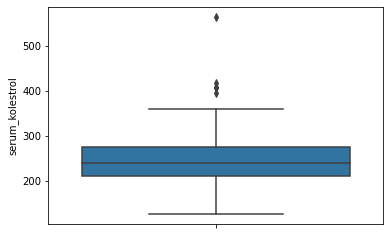

In [36]:
sns.boxplot(data=veri,y="serum_kolestrol")
plt.show()

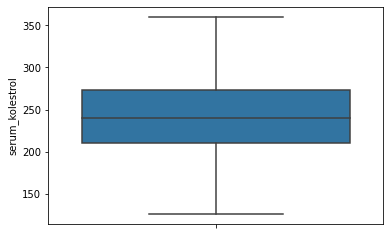

In [37]:
veri_temiz=veri[(veri["serum_kolestrol"]>=alt_sk)&(veri["serum_kolestrol"]<=ust_sk)]
sns.boxplot(data=veri_temiz,y="serum_kolestrol")
plt.show()